In [48]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris

In [49]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [45]:
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

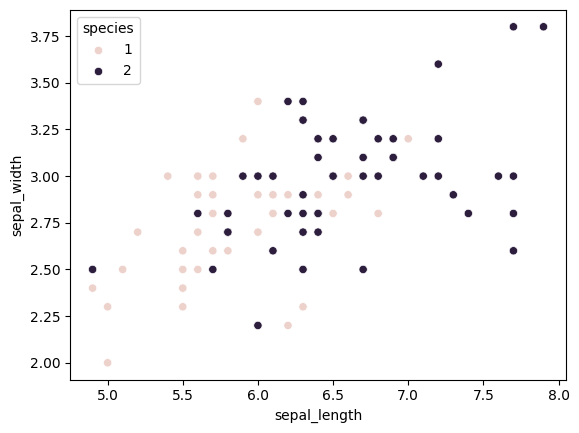

In [51]:
import seaborn as sns

sns.scatterplot(data=new_df, x='sepal_length', y='sepal_width', hue='species')

In [52]:
random_df = new_df.sample(100) # Randomizing the dataset

df_train = random_df.iloc[:60, :].sample(10)
df_val = random_df.iloc[60:80, :].sample(5)
df_test = random_df.iloc[80:100, :].sample(5)


In [54]:
df_train

,sepal_length,sepal_width,species
59,5.2,2.7,1
92,5.8,2.6,1
102,7.1,3.0,2
50,7.0,3.2,1
135,7.7,3.0,2
144,6.7,3.3,2
67,5.8,2.7,1
93,5.0,2.3,1
52,6.9,3.1,1
77,6.7,3.0,1


In [55]:
df_val

,sepal_length,sepal_width,species
123,6.3,2.7,2
113,5.7,2.5,2
71,6.1,2.8,1
104,6.5,3.0,2
62,6.0,2.2,1


In [56]:
df_test

,sepal_length,sepal_width,species
143,6.8,3.2,2
54,6.5,2.8,1
147,6.5,3.0,2
97,6.2,2.9,1
73,6.1,2.8,1


In [58]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

In [59]:
X_test

array([[6.3, 2.7],
       [5.7, 2.5],
       [6.1, 2.8],
       [6.5, 3. ],
       [6. , 2.2]])

In [60]:
y_test

array([2, 2, 1, 2, 1])

### CASE 1: Bagging

In [ ]:
# Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]
df_bag

,sepal_length,sepal_width,species
50,7.0,3.2,1
59,5.2,2.7,1
93,5.0,2.3,1
102,7.1,3.0,2
135,7.7,3.0,2
92,5.8,2.6,1
144,6.7,3.3,2
67,5.8,2.7,1


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

Accuracy of Bagged Decision Tree 1: 0.8


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


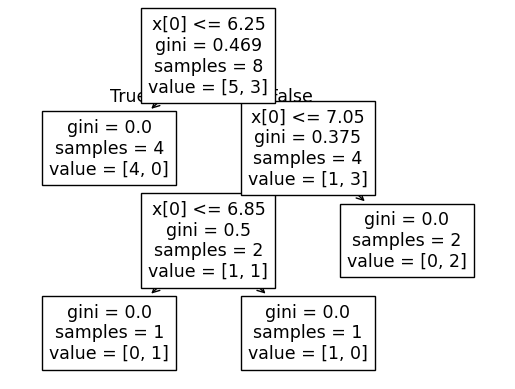

In [69]:
dt_bag1 = DecisionTreeClassifier()
dt_bag1.fit(X, y)
plot_tree(dt_bag1)
y_pred_bag1 = dt_bag1.predict(X_test)
accuracy_bag1 = accuracy_score(y_test, y_pred_bag1)
print(f"Accuracy of Bagged Decision Tree 1: {accuracy_bag1:.2}")

In [87]:
# Tree 2
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]
df_bag

,sepal_length,sepal_width,species
135,7.7,3.0,2
59,5.2,2.7,1
52,6.9,3.1,1
77,6.7,3.0,1
52,6.9,3.1,1
67,5.8,2.7,1
92,5.8,2.6,1
93,5.0,2.3,1


Accuracy of Bagged Decision Tree 2: 0.4


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


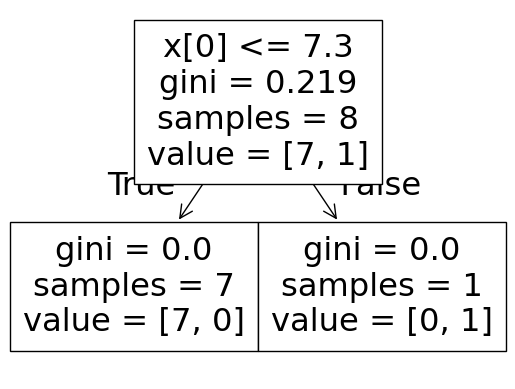

In [88]:
dt_bag2 = DecisionTreeClassifier()
dt_bag2.fit(X, y)
plot_tree(dt_bag2)
y_pred_bag2 = dt_bag2.predict(X_test)
accuracy_bag2 = accuracy_score(y_test, y_pred_bag2)
print(f"Accuracy of Bagged Decision Tree 2: {accuracy_bag2:.2}")

In [92]:
# Tree 3
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]
df_bag

,sepal_length,sepal_width,species
93,5.0,2.3,1
102,7.1,3.0,2
102,7.1,3.0,2
59,5.2,2.7,1
67,5.8,2.7,1
92,5.8,2.6,1
50,7.0,3.2,1
93,5.0,2.3,1


Accuracy of Bagged Decision Tree 3: 0.4


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


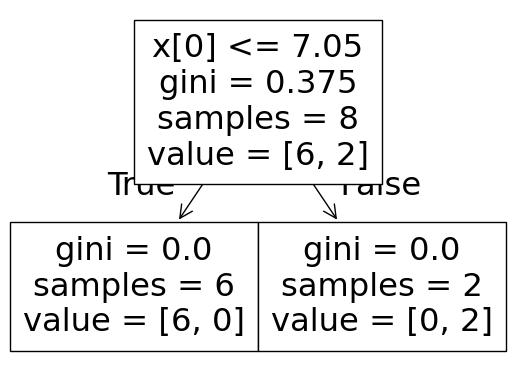

In [93]:
dt_bag3 = DecisionTreeClassifier()
dt_bag3.fit(X, y)
plot_tree(dt_bag3)
y_pred_bag3 = dt_bag3.predict(X_test)
accuracy_bag3 = accuracy_score(y_test, y_pred_bag3)
print(f"Accuracy of Bagged Decision Tree 3: {accuracy_bag3:.2}")

In [95]:
print("Predictor 1:", dt_bag1.predict(np.array([3.2, 4.7]).reshape(1,2)))
print("Predictor 2:", dt_bag2.predict(np.array([3.2, 4.7]).reshape(1,2)))
print("Predictor 3:", dt_bag3.predict(np.array([3.2, 4.7]).reshape(1,2)))

Predictor 1: [1]
Predictor 2: [1]
Predictor 3: [1]


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
